# Step 1 Data mining

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
# drop useless column and the column missing many data
df=df.drop(columns=['PassengerId','Name','Cabin','Ticket'])

In [7]:
#combine sibling number with parents number to famiy number
df['family']=df['SibSp']+df['Parch']

In [8]:
df=df.drop(columns=['SibSp','Parch'])

In [9]:
df['is_alone']=df['family'].apply(lambda x:1 if x==0 else 0)

In [10]:
# trun sex to dummy variable
df['is_female']= df['Sex'].apply(lambda x:1 if x =='female' else 0 )

In [11]:
df=df.drop(columns=['Sex'])

/Users/jameswang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

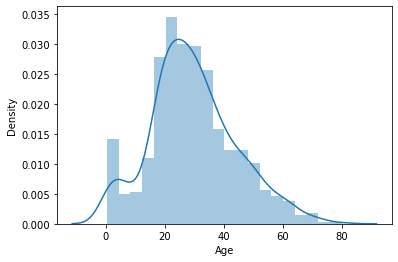

In [12]:
# check the distribute of age
sns.distplot(df[df['Age'].notnull()]['Age'])

In [13]:
df['Age']=df['Age'].interpolate()

In [14]:
df['is_child']=df['Age'].apply(lambda x:1 if x<18 else 0)

In [15]:
#fill the Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df['Embarked']=df['Embarked'].fillna('S')

In [17]:
df=pd.get_dummies(df,prefix='is')

In [18]:
df.head()

,Survived,Pclass,Age,Fare,family,is_alone,is_female,is_child,is_C,is_Q,is_S
0,0,3,22.0,7.2500,1,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,1,0,0
2,1,3,26.0,7.9250,0,1,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   family     891 non-null    int64  
 5   is_alone   891 non-null    int64  
 6   is_female  891 non-null    int64  
 7   is_child   891 non-null    int64  
 8   is_C       891 non-null    uint8  
 9   is_Q       891 non-null    uint8  
 10  is_S       891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [20]:
x , y = df.drop(columns=['Survived']), df['Survived']

# Step 2 Build model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8,
                                                    test_size=0.2,random_state=20)

## Logistic Regression

In [82]:
model_LR = LogisticRegression()
model_LR.fit(train_x,train_y)
pred_y=model_LR.predict(test_x)
acc_log_reg=round(model_LR.score(test_x,test_y)*100,2)
print(str(acc_log_reg)+'percent')

83.24percent


/Users/jameswang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
confusion_matrix(test_y, pred_y, labels=[1, 0])


array([[ 47,  20],
       [ 10, 102]])

In [41]:
a=str((102+47)/(102+10+20+47))
print('Correct rate is '+ a +'percent')

Correct rate is 0.8324022346368715percent


## Decision Tree

In [75]:
model_tree =DecisionTreeClassifier(max_depth=3, random_state=20)
model_tree.fit(train_x,train_y)
pred_y=model_tree.predict(test_x)
acc_log_reg=round(model_tree.score(test_x,test_y)*100,2)
print(str(acc_log_reg)+'percent')

81.56percent


In [76]:
confusion_matrix(test_y, pred_y, labels=[1, 0])

array([[ 38,  29],
       [  4, 108]])

In [77]:
a=str((38+108)/(38+29+4+108))
print('Correct rate is '+ a +'percent')

Correct rate is 0.8156424581005587percent


## SVC

In [58]:
model_svc = SVC()
model_svc.fit(train_x,train_y)
pred_y=model_svc.predict(test_x)
acc_log_reg=round(model_svc.score(test_x,test_y)*100,2)
print(str(acc_log_reg)+'percent')

68.16percent


In [59]:
confusion_matrix(test_y, pred_y, labels=[1, 0])

array([[ 22,  45],
       [ 12, 100]])

In [60]:
a=str((22+100)/(22+45+12+100))
print('Correct rate is '+ a +'percent')

Correct rate is 0.6815642458100558percent


## Random Forest

In [83]:
model_RF = RandomForestClassifier(max_depth=3, random_state=20)
model_RF.fit( train_x, train_y)
pred_y=model_RF.predict(test_x)
acc_log_reg=round(model_RF.score(test_x,test_y)*100,2)
print(str(acc_log_reg)+'percent')

83.24percent


In [80]:
confusion_matrix(test_y, pred_y, labels=[1, 0])

array([[ 40,  27],
       [  3, 109]])

In [81]:
a=str((40+109)/(40+27+3+109))
print('Correct rate is '+ a +'percent')

Correct rate is 0.8324022346368715percent


In [ ]:
# I have trained 4 model to make the classification. There are Logistic Regression,
# Descision tree, SVC, and Random Forest. At first, I think the Random Forest will have the
# best correct rate. However, Logistic Regression has the same correct rate as the random
# forest model. As a result, I will use both model to run the Hold_out testing to find out
# which model is the best.

# Step 3 Run the hand_out testing

In [114]:
df1=pd.read_csv('holdout_test.csv')

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [120]:
df1=df1.drop(columns=['PassengerId','Name','Cabin','Ticket'])
df1['family']=df1['SibSp']+df1['Parch']
df1=df1.drop(columns=['SibSp','Parch'])
df1['is_alone']=df1['family'].apply(lambda x:1 if x==0 else 0)
df1['is_female']= df1['Sex'].apply(lambda x:1 if x =='female' else 0 )
df1=df1.drop(columns=['Sex'])
df1['Age']=df1['Age'].interpolate()
df1['is_child']=df1['Age'].apply(lambda x:1 if x<18 else 0)
df1['Fare']=df1['Fare'].fillna(mean(df1[df1['Fare'].notnull()]['Fare']))
df1=df1.drop(columns=['Survived'])
df1=pd.get_dummies(df1,prefix='is')

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Age        418 non-null    float64
 2   Fare       418 non-null    float64
 3   family     418 non-null    int64  
 4   is_alone   418 non-null    int64  
 5   is_female  418 non-null    int64  
 6   is_child   418 non-null    int64  
 7   is_C       418 non-null    uint8  
 8   is_Q       418 non-null    uint8  
 9   is_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [122]:
model_tree =DecisionTreeClassifier(max_depth=3, random_state=20)
model_tree.fit(train_x,train_y)
pred_df=model_tree.predict(df1)

In [125]:
df_help=pd.read_csv('holdout_test.csv')
pred_result=pd.DataFrame({
    'PassengerId':df_help['PassengerId'],
    'Survived':pred_df
})

In [128]:
pred_result.to_csv('Titanic_result_ccwang4.csv',index=False)